Student Performance Indicator

Life Cycle of This Project:
Understanding the Problem Statement
Data Collection
Perform Data Checks
Exploratory Data Analysis
Data Preprocessing
Model Training
Choosing Best Performing Model

1. Problem Statement
The goal of this project is to understand the influence of the parents background, test preparation, and various other variables on the students performance.

The dataset is designed for data science training and is fictional. It includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.

Consists of 8 columns and 1000 rows.

In [56]:
import warnings
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<!-- Dataset Information -->
Gender: Sex of a student (Male/Female)
Race/ethnicity: Ethnicity of a student (Group A,B,C,D,E)
Parental level of education : parents' final education (bachelor's degree,some college,master's degree,associate's degree,high school)
Lunch : having lunch before test (standard or free/reduced)
Test preparation course : complete or not complete before test
Math score
Reading score
Writing score

<!-- Perform Data Checks -->
Check Missing values
Check Duplicates
Check Datatypes
Check the number of unique values in each column
Check statistics of the dataset
Check various categories present in the different categorical column

In [58]:
df.shape

(1000, 8)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [60]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights from the statistics:

The students' average performance on all three courses is similar. The mean of all three courses is close and between 66 and 68.1

The standard deviation is also very close of all three courses.

Reading score has the highest minimum of 17

In [61]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in this dataset. If there were any, we would either drop those values or use Imputation.

In [62]:
#Now checking duplicates values
print(df.duplicated().sum())

0


There are no duplicate values in this dataset. If there were any, we would drop them using df.drop_duplicates()

Checking the number of unique values in each column

In [63]:
df.nunique()
# Generally, the higher the number of unique values of a certain column, the higher the chance of it being continuous variable.

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Checking Various Categories in Each Column

In [64]:
for col in df.columns:
    if col not in ['math score', 'reading score', 'writing score']:
        print(f'Categories in {col}: {df[col].unique()}')

Categories in gender: ['female' 'male']
Categories in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch: ['standard' 'free/reduced']
Categories in test preparation course: ['none' 'completed']


First: What Is Happening Here?
Step 1:
for col in df.columns:
Meaning:
Loop through every column in dataframe.
If your columns are:
gender
race/ethnicity
lunch
etc.
It will check each one.

Step 2:
if col not in ['math score', 'reading score', 'writing score']:
Why exclude these?
Because:
These are numerical continuous values
They are not categories
They have many different numbers (0–100)
We only want categorical columns.

Step 3:
df[col].unique()
What does this do?
It returns:
All distinct values inside that column.
Example:
For gender:
['female', 'male']

Feature Engineering

In [65]:
df['Total Score'] = df['math score']  + df['reading score']  + df['writing score']

In [66]:
df['Average'] = df['Total Score'] / 3

In [67]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [68]:
print('Number of students having more than or equal to 200 total marks: {0}'.format(
    len(df[df['Total Score'] >= 200])))

print('Number of students having more than or equal to 70 average marks: {0}'.format(
    len(df[df['Average'] >= 70])))

Number of students having more than or equal to 200 total marks: 556
Number of students having more than or equal to 70 average marks: 459


In [69]:
print('Number of females having more than or equal to 70 marks in maths: {0}'.format(
    len(df[df['math score'] >= 70][df['gender'] == 'female'])))

print('Number of males having more than or equal to 70 marks in maths: {0}'.format(
    len(df[df['math score'] >= 70][df['gender'] == 'male'])))

Number of females having more than or equal to 70 marks in maths: 178
Number of males having more than or equal to 70 marks in maths: 231


In [70]:
print('Number of females having more than or equal to 250 total marks: {0}'.format(
    len(df[df['Total Score'] >= 200][df['gender'] == 'female'])))

print('Number of males having more than or equal to 250 total marks: {0}'.format(
    len(df[df['Total Score'] >= 200][df['gender'] == 'male'])))

Number of females having more than or equal to 250 total marks: 317
Number of males having more than or equal to 250 total marks: 239


Now: Visualization Section

AttributeError: module 'matplotlib.pyplot' has no attribute 'subl'

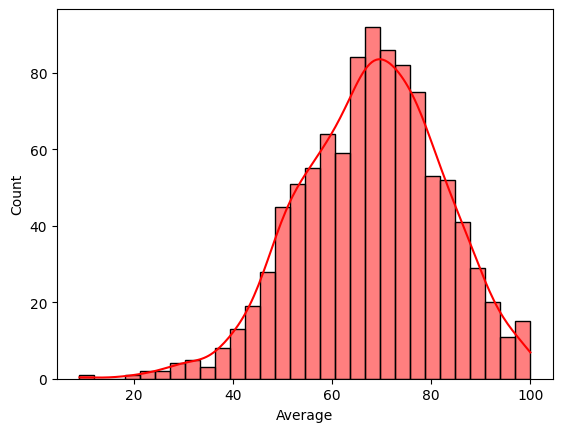

In [71]:
# Histogram   ::        Frequency distribution of numerical data.
# Meaning:
# How many students scored between 60–70?
# 70–80?
# 80–90?
sns.histplot(data=df, x='Average', bins=30, kde=True, color= 'red')
plt.subl

Why bins=30?
Bins divide data into intervals.
More bins → more detailed.
Less bins → smoother but less detailed.

Why kde=True?
KDE = Kernel Density Estimate
It draws smooth curve over histogram.
Why?
To see distribution shape clearly.

<Axes: xlabel='Average', ylabel='Count'>

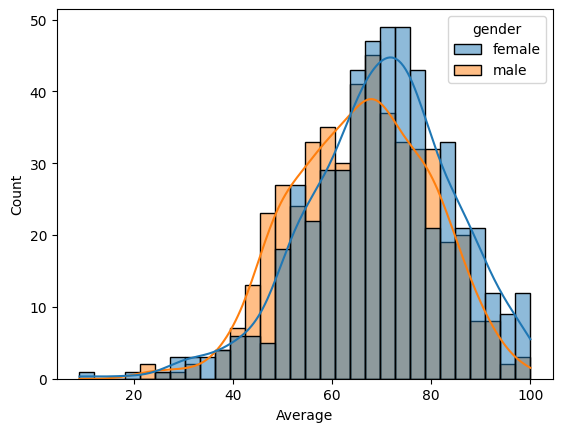

In [ ]:
sns.histplot(data = df , x = 'Average', bins = 30 , kde = True, hue = 'gender')

Why use hue?
To compare groups inside same graph.
Instead of 2 separate graphs,
we overlay them.
This helps answer:
Which gender scores higher overall?

Visualize total score distribution

[]

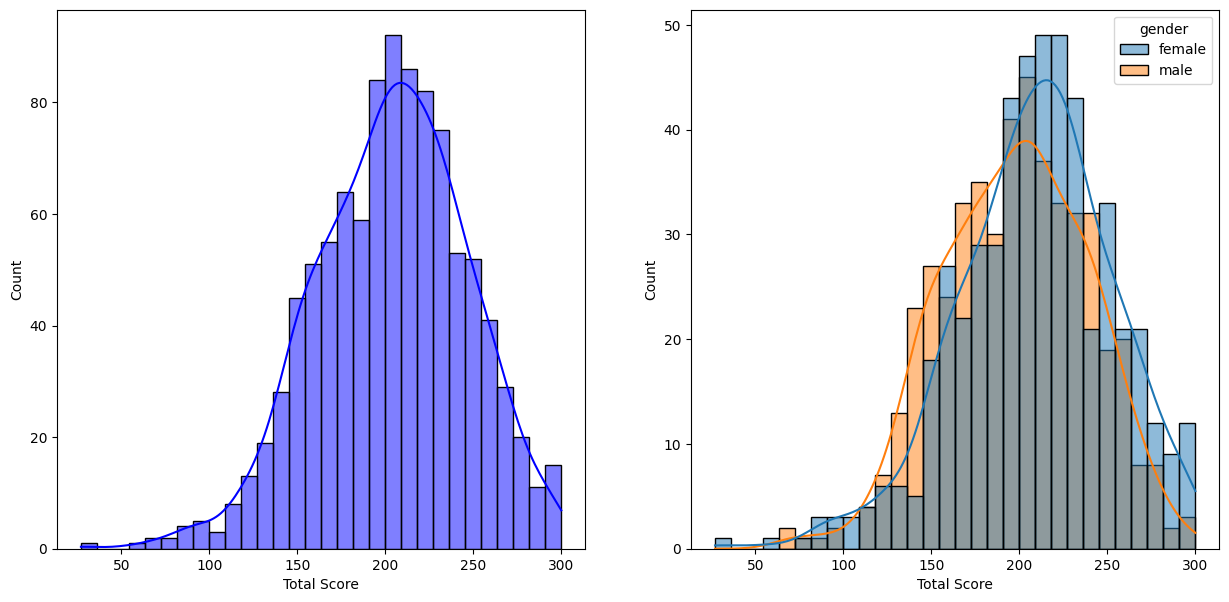

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Total Score', bins=30, kde=True, color='blue')

plt.subplot(122)
sns.histplot(data=df, x='Total Score', bins=30, kde=True, hue='gender')
plt.plot()

The majority of students have a total score that is between ~ 180 and 240.
We can see in the second graph that more females have gotten higher total scores than boys.
Female students tend to perform better overall compared to male students in this case.

Math score distribution based on gender

[]

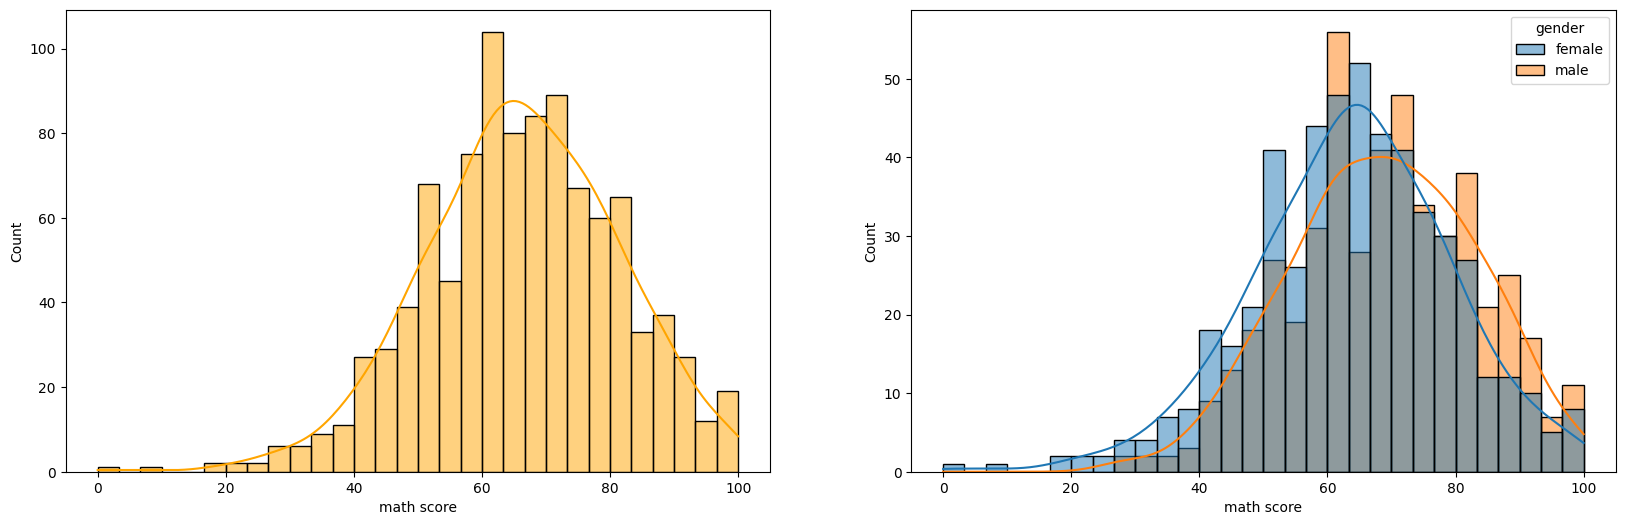

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.subplot(121)
sns.histplot(data=df, x='math score', bins=30, kde=True, color='orange')
plt.subplot(122)
sns.histplot(data=df, x='math score', bins=30, kde=True, hue='gender')
plt.plot()

#In terms of math score, males have performed better compared to females.

Let us now see the average score distribution based on the variable lunch.

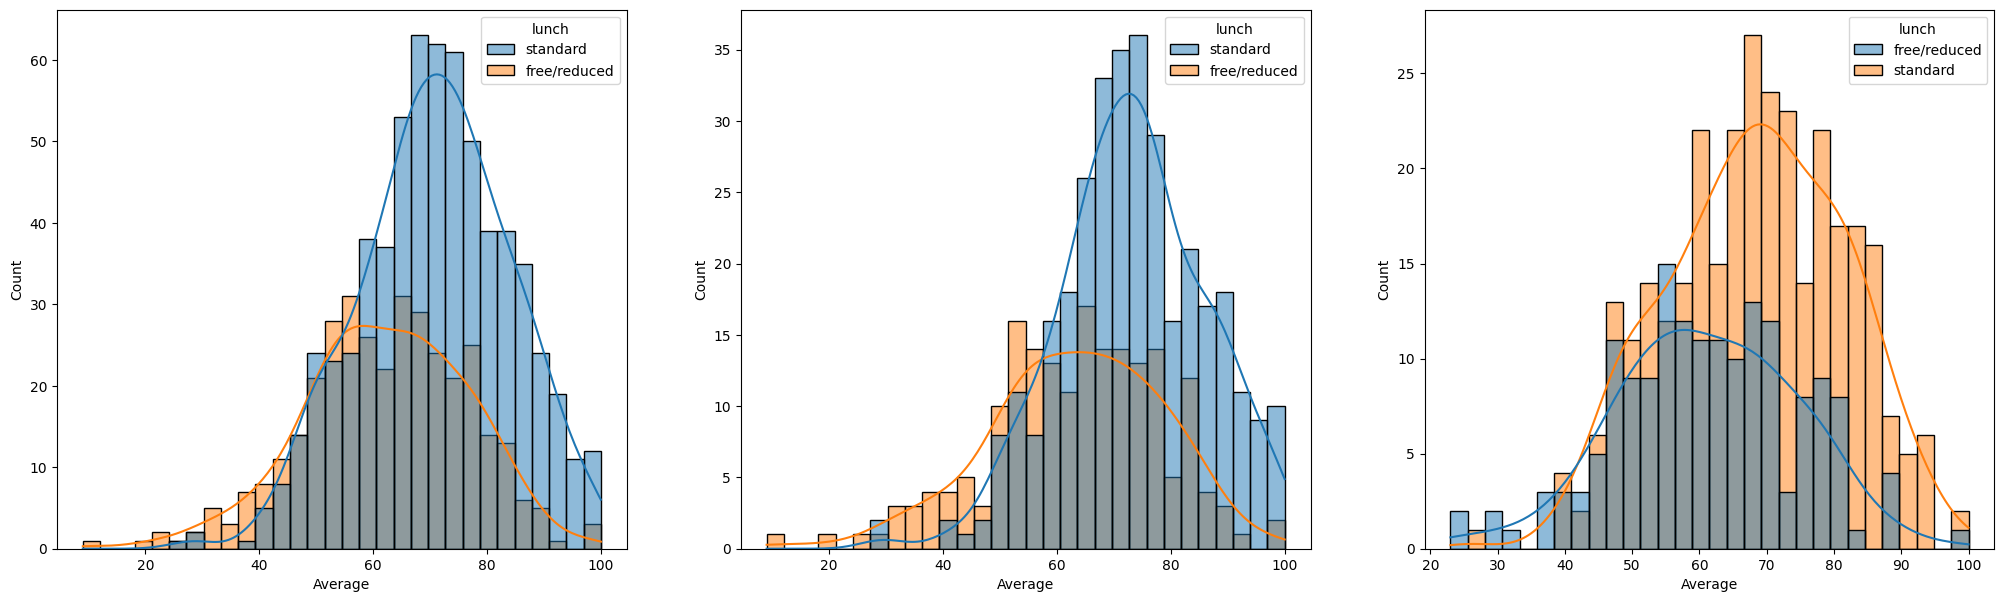

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7))
plt.subplot(131)
sns.histplot(data=df, x='Average', bins=30, kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='Average', bins=30, kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],
             x='Average', bins=30, kde=True, hue='lunch')
plt.show()


# Insights:
# Standard lunch helps perform well in exams.
# Standard lunch helps perform well in exams be it a male or a female.

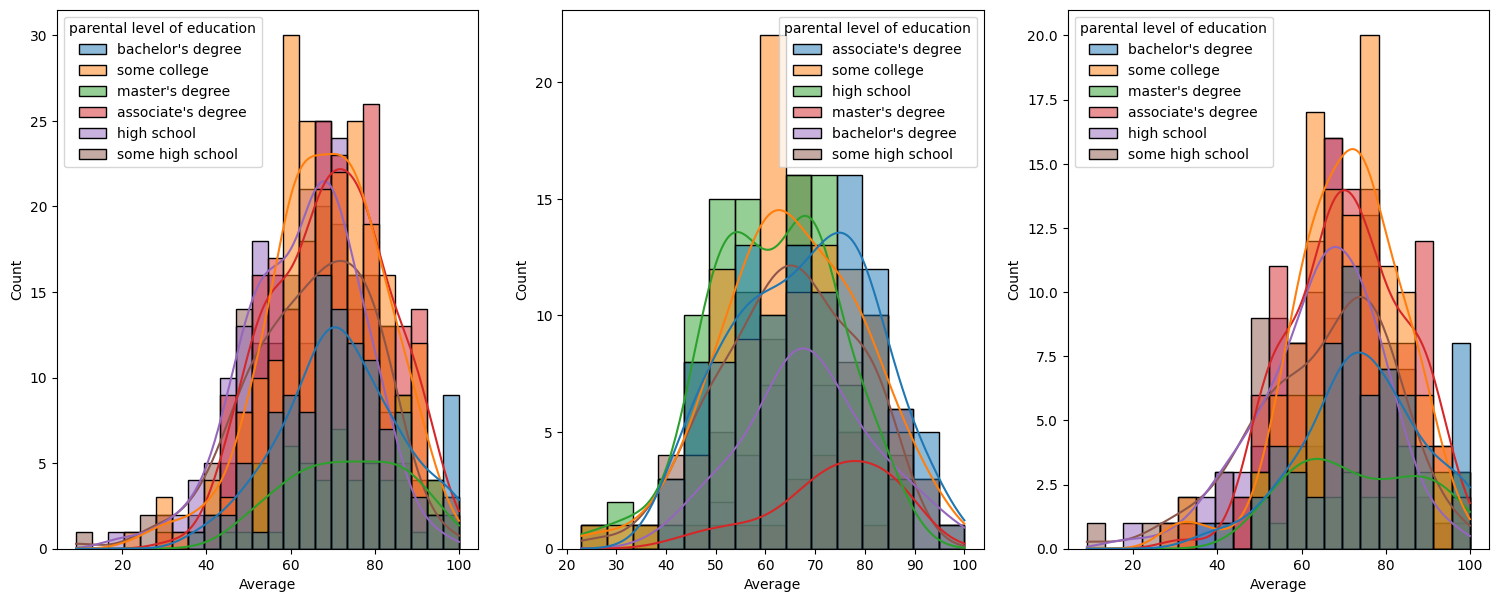

In [ ]:
plt.subplots(1, 3, figsize=(25, 7))
plt.subplot(141)
ax = sns.histplot(data=df, x='Average', kde=True,
                  hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'male'], x='Average',
                  kde=True, hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'female'], x='Average',
                  kde=True, hue='parental level of education')
plt.show()

Insights:

First graph shows that parents that had some sort of masters or bachelors degree helped their children perform better.

Second graph shows that male students tend to perform better if they have parents the have associate or bachelors degree.

Third graph shows that higher education of parents doesn't really improve the performance of female students. Although, majority of females who got an average score of 100 or closer to 100 have either associate or bachelors degree.

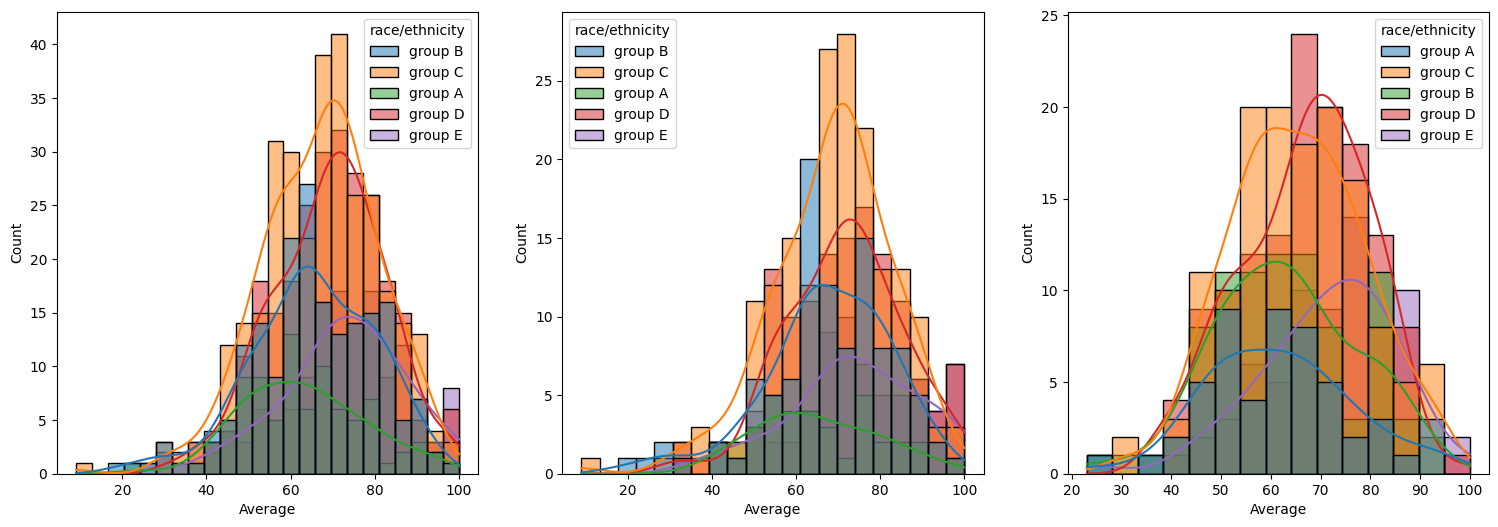

In [ ]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='Average', kde=True, hue='race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'],
                  x='Average', kde=True, hue='race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'],
                  x='Average', kde=True, hue='race/ethnicity')
plt.show()

Insights:

Group E and D tends to perform better than other groups regardless of the sex.
Group A and B tend to perform poorly irrespective of their gender.

Violin Plot

What is a Violin Plot?
A violin plot is a data visualization tool that shows:
Distribution of data
Density of values
Spread of data
Median
Range
It combines:
📦 Boxplot + 📈 Density Curve (KDE)
So instead of just showing min, max, median (like boxplot),
it also shows how frequently values occur.

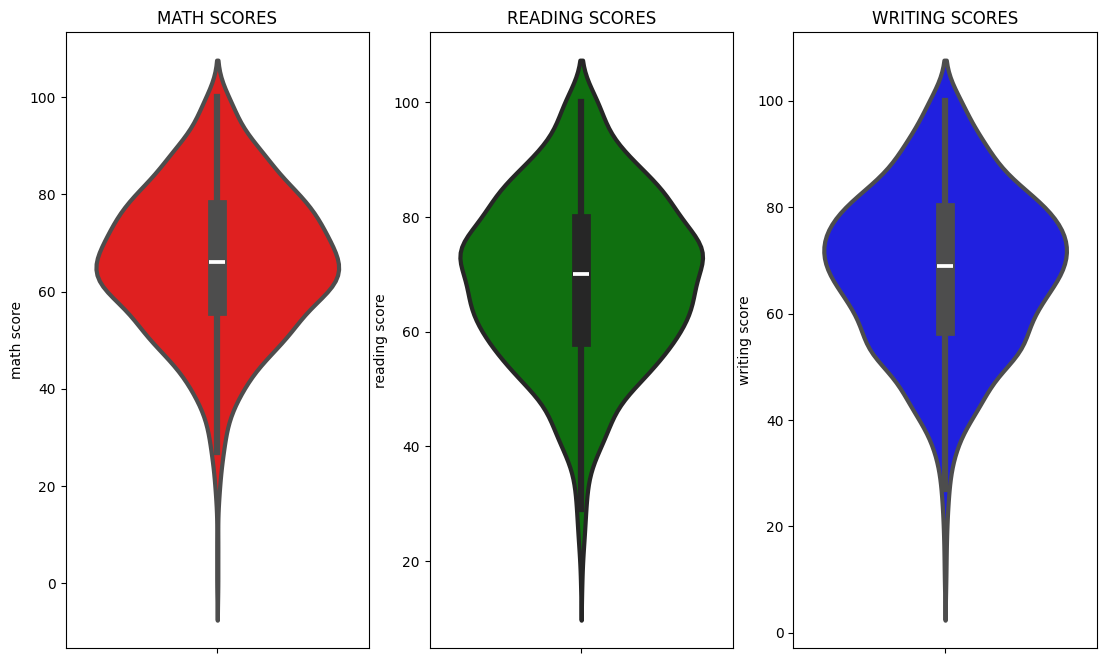

In [ ]:
plt.figure(figsize=(18, 8))
# Creates a blank canvas for plotting.
# 18 → width
# 8 → height

plt.subplot(1, 4, 1)   # plt.subplot(rows, columns, position)  (Think of it like dividing paper into boxes.)

plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)  #linewidth=3 Thickness of boundary lines.

# y='math score'
# Means:
# Plot vertical violin.
# Values will be shown on Y-axis.
# X-axis is empty (single distribution).


plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

plt.show()

How to Interpret It?

If violin is:

🔹 Wide in middle:

Many students scored around that value.

🔹 Thin at ends:

Few students scored extreme values.

🔹 Long shape:

High spread (high variation).

What Is Happening Internally?

Here is the real understanding.

When you write:

sns.violinplot(y='math score', data=df)

Seaborn does this internally:

Step 1️⃣: It collects all math scores.

Like:

72, 69, 90, 47, 76, ...
Step 2️⃣: It calculates density using KDE.

KDE = Kernel Density Estimation

This estimates:

How densely packed values are at each point.

If many students scored around 70,
density is high at 70.

Step 3️⃣: It mirrors the density curve.

That’s why it looks like a violin 🎻

Left side → density

Right side → mirrored density

Step 4️⃣: It adds boxplot inside.

It also shows:

Median line

Interquartile range (middle 50%)

So you get:

Info	Shown?
Median	✅
Spread	✅
Density	✅
Outliers	Sometimes

<Axes: title={'center': 'Writing scores'}, xlabel='writing score'>

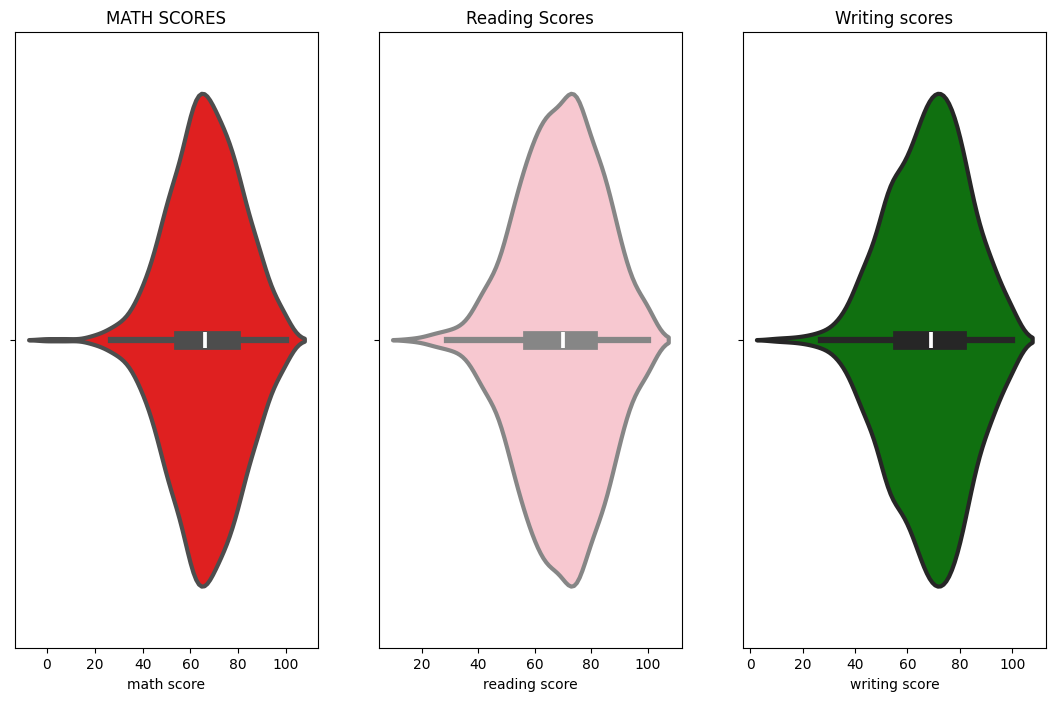

In [ ]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(x='math score', data=df, color='red', linewidth=3)

plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(x = 'reading score', data = df, color = 'pink' , linewidth = 3)

plt.subplot(1,4,3)
plt.title('Writing scores')
sns.violinplot(x = 'writing score', data = df , color = 'green', linewidth = 3)

# Insights:
# Most of the students have scores in between 60 and 80 in maths.
# Most of the students have scores in between 50 and 80 in reading and writing